In [ ]:
!pip install -q py-feat
# !pip install -q facial-emotion-recognition
# !pip install -q fer
# !pip install -q deepface
!pip install -q mtcnn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
from feat import Detector
import glob
import math
import dlib
import joblib
import cv2
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow
from collections import Counter
from mtcnn import MTCNN

In [ ]:
################ FER
# https://github.com/justinshenk/fer
# from fer import FER
# import operator
# # detector = FER()
# detector = FER(mtcnn=True)

################ DeepFace
# from deepface import DeepFace
# https://awesomeopensource.com/project/serengil/deepface
# obj = DeepFace.analyze(img_path = "img4.jpg", actions = ['age', 'gender', 'race', 'emotion'])
# print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

################# py-feat
# from feat import Detector
face_model = "MTCNN"
landmark_model = "PFLD"
au_model = "rf"
emotion_model = "resmasknet" #resmasknet,fer, svm, rf
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

detector_MTCNN = MTCNN()

In [4]:
def cal_mean_std(image):
  val = np.reshape(image[:,:,0], -1)
  img_mean = np.mean(val)
  img_std = np.std(val)
  X = np.array([img_mean, img_std]).reshape(1, -1)
  return X

def my_mode(sample):
  c = Counter(sample)
  return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

## ALL STEP IN ONE

In [22]:
ls 'drive/MyDrive/file2/files/'

01_blackping_P1.csv  03_PaeArak_P1.csv  05_pimrypie_tony_P1.csv
01_blackping.xlsx    03_PaeArak.xlsx    05_pimrypie_tony.xlsx
02_pimrypie_P1.csv   04_one31_P1.csv
02_pimrypie.xlsx     04_one31.xlsx


In [ ]:
pred_emotion= []

filepath = 'drive/MyDrive/file2/files/05_pimrypie_tony_P1.csv'
vdopath = 'drive/MyDrive/file2/vdo/05_pimrypie_tony.mp4'
df = pd.read_csv(filepath)

rowimg = []
label_img = []

print('df', df.shape)

for i in tqdm(range(df.shape[0])):
  seqimg = []
  for j in range(df['start_frame'][i], df['end_frame'][i]):
    cap = cv2.VideoCapture(vdopath)
    cap.set(cv2.CAP_PROP_POS_FRAMES, j)
    success, image = cap.read()
    scale_percent = 50 
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim)

    try:
      faceimg = detector_MTCNN.detect_faces(resized)
      faceimg = faceimg[0]['box']
      faceimg =resized[faceimg[1]-30:faceimg[1]+faceimg[3]+30,faceimg[0]-30:faceimg[0]+faceimg[2]+30] #[x, y, width, height]  
      # cv2_imshow(faceimg)
    except:
      try:
        faceimg = detect_faces(resized)
      except:
        print("Crop face Error  i = ",i, ' j =', j)

    try:
      detected_faces = [[0, 0, faceimg.shape[0]-1, faceimg.shape[1]-1, 1]]
      detected_landmarks = detector.detect_landmarks(faceimg, detected_faces)
      ypred = detector.detect_emotions(faceimg, detected_faces, detected_landmarks)[0]
      ypred_arg = np.argmax(ypred)
      seqimg.append(ypred_arg) 
    except:
      print("Emotion Error  i = ",i, ' j =', j)

  seq_label = my_mode(seqimg)
  print('i =', i, 'seq_label =', seq_label)
  pred_emotion.append(seq_label[0])

df (69, 7)


i = 0 seq_label = [1, 6]
i = 1 seq_label = [6]
Emotion Error  i =  2  j = 771
Emotion Error  i =  2  j = 772
Emotion Error  i =  2  j = 773
Emotion Error  i =  2  j = 775
Crop face Error  i =  2  j = 832
Emotion Error  i =  2  j = 832
Crop face Error  i =  2  j = 833
Emotion Error  i =  2  j = 833
Crop face Error  i =  2  j = 834
Emotion Error  i =  2  j = 834
Crop face Error  i =  2  j = 835
Emotion Error  i =  2  j = 835
Crop face Error  i =  2  j = 836
Emotion Error  i =  2  j = 836
Crop face Error  i =  2  j = 837
Emotion Error  i =  2  j = 837
Crop face Error  i =  2  j = 838
Emotion Error  i =  2  j = 838
Crop face Error  i =  2  j = 839
Emotion Error  i =  2  j = 839
Crop face Error  i =  2  j = 840
Emotion Error  i =  2  j = 840
Crop face Error  i =  2  j = 841
Emotion Error  i =  2  j = 841
Crop face Error  i =  2  j = 842
Emotion Error  i =  2  j = 842
Crop face Error  i =  2  j = 843
Emotion Error  i =  2  j = 843
Crop face Error  i =  2  j = 844
Emotion Error  i =  2  j = 8

In [15]:
dic_resmask =  {0:'anger',1:'disgust', 2:'fear', 3:'happiness',4:'sadness',	5:'surprise',	6:'neutral' }
# dic_kagle =  {0:'anger',1:'disgust', 2:'fear', 3:'happiness',4:'sadness',	5:'surprise',	6:'neutral' }
# dic_ckplus =  {1:'anger',3:'disgust', 4:'fear', 5:'happiness',6:'sadness',	7:'surprise'}
# dic_fer_svm_rf =  {0:'anger',1:'disgust', 2:'fear', 3:'happiness',4:'sadness',	5:'surprise',	6:'neutral' }
# dic_fer_svm_rf =  {0:'anger',1:'disgust', 2:'fear', 3:'happiness',4:'sadness',	5:'surprise',	6:'neutral' }
# dic_Deepfake =  {0:'anger',1:'fear', 2:'neutral', 3:'sad',4:'disgust',	5:'happy',	6:'surprise' }

pred = pd.DataFrame({'Pred':pred_emotion})
pred['emotion'] = pred['Pred'].replace(dic_resmask) 
result = pd.concat([df, pred], axis=1, join="inner")

from google.colab import files
result.to_csv('05_pimrypie_tony_R1.csv') 
files.download('05_pimrypie_tony_R1.csv')

In [ ]:
while True:pass

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           3       0.94      0.21      0.34        76
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.21        77
   macro avg       0.19      0.04      0.07        77
weighted avg       0.93      0.21      0.34        77

Accuracy:  0.2077922077922078


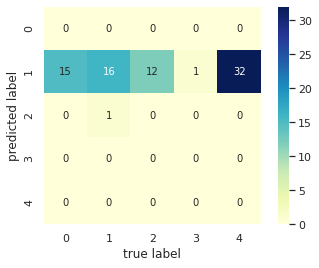

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix



def plot_confus(pred_lable, truelable):
  print(metrics.classification_report(pred_lable, truelable))
  print('Accuracy: ',metrics.accuracy_score(truelable, pred_lable))

  mat = confusion_matrix(truelable, pred_lable)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu")
  # tick_marks = np.arange(len(target_names))
  # plt.xticks(tick_marks, target_names, rotation ='vertical', ha='center')
  # plt.yticks(tick_marks, target_names, rotation ='horizontal', ha='center')
  plt.xlabel('true label')
  plt.ylabel('predicted label'); 

plot_confus(df['pred'], df['label'])